In [12]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Create the data
---
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification


In [13]:
    X,y = make_classification(n_samples=1000, n_features=2,
                        n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
                        n_clusters_per_class=2, weights=None, flip_y=0.01,
                        class_sep=2.0, hypercube=True, shift=0.0, scale=1.0,
                        shuffle=True, random_state=42)

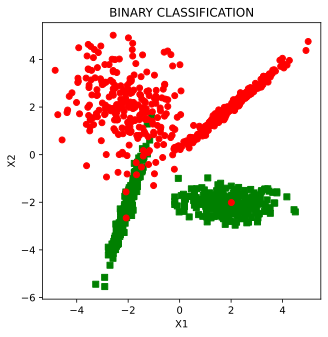

In [14]:
# convert to a pytorch tensor
data = torch.tensor(X).float()
labels = torch.tensor(y).float()
labels = labels.view(-1, 1)

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'gs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ro')
plt.title('BINARY CLASSIFICATION')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [15]:
def CreateModel(learningRate):

  # model architecture
  ANN = nn.Sequential(
      nn.Linear(2,1),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
        )

  # loss function
  lossfunc = nn.BCEWithLogitsLoss()

  # optimizer
  optim = torch.optim.SGD(ANN.parameters(),lr=learningRate)

  # model output
  return ANN,lossfunc,optim

In [16]:
# a function that trains the model

# a fixed parameter
epochs = 1000

def train(ANNmodel):

    # initialize losses
    losses = torch.zeros(epochs)

    # loop over epochs
    for i in range(epochs):

        # forward pass
        pred = ANNmodel(data)

        # compute loss
        loss = lossfunc(pred,labels)
        losses[i] = loss

        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()



    # final forward pass
    predictions = ANNmodel(data)

    # compute the predictions and report accuracy
    # NOTE: shouldn't it be predictions>.5??
    totalacc = 100*torch.mean(((predictions>0) == labels).float())

    return losses,predictions,totalacc

# Single Experiment

Final accuracy: 92.8%


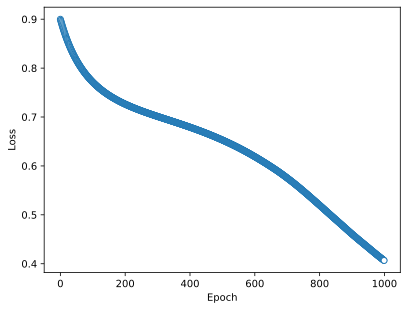

In [17]:
# create everything
ANN,lossfunc,optim = CreateModel(.01)

# run it
losses,predictions,totalacc = train(ANN)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

# Multiple Experiment

In [18]:
# the set of learning rates to test
learningrates = np.linspace(.001,.1,10)
learningrates = np.round(learningrates, 2)
# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),epochs))


# loop through learning rates
for i,lr in enumerate(learningrates):

    # create and run the model
    ANN,lossfunc,optim = CreateModel(lr)
    losses,predictions,totalacc = train(ANN)

    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()


/tmp/ipython-input-2251165324.py:18: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


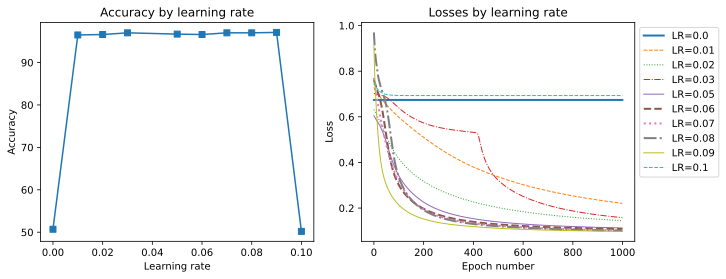

In [19]:
# Create a colormap
cmap = plt.get_cmap('tab10')

# Define custom line styles
line_styles = [
    ('-', 2),   # Solid line, bold
    ('--', 1),  # Dashed line, normal
    (':', 1),   # Dotted line, normal
    ('-.', 1),  # Dash-dot line, normal
    ('-', 1),   # Solid line, normal
    ('--', 2),  # Dashed line, bold
    (':', 2),   # Dotted line, bold
    ('-.', 2),  # Dash-dot line, bold
    ('-', 1),   # Solid line, normal
    ('--', 1)   # Dashed line, normal
]

# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

# Plot losses by learning rate with customized line styles
for i, lr in enumerate(learningrates):
    linestyle, linewidth = line_styles[i % len(line_styles)]
    ax[1].plot(allLosses[i], label=f'LR={lr}', color=cmap(i % 10), linestyle=linestyle, linewidth=linewidth)

ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')

# Add legend outside of the second subplot
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

In [20]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.8000)

# Run a meta-experiment to get more reliable results

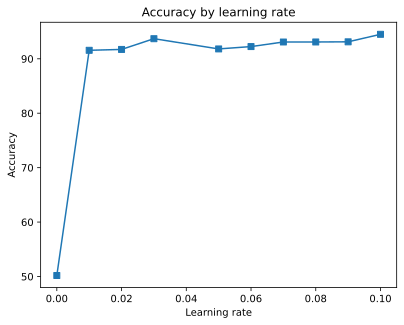

In [21]:
# Number of experiments to conduct
Exps = 100

# Storing the results
# Instiate at zero
accMeta = np.zeros((Exps,len(learningrates)))

# fnumber of epochs
epochs = 1000

# now for the experiment
for i in range(Exps):
  for j,lr in enumerate(learningrates):

    # create and run the model
    ANN,lossfunc,optim = CreateModel(lr)
    losses,predictions,totalacc = train(ANN)

    # store the results
    accMeta[i,j] = totalacc



# now plot the results, averaged over experiments
plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

# Experiments
---

1) Recreate the experiment with the learning rate starting from 0.1 and ends in 0.9 with increments of 0.1.

2) Play around with the make_classifier function, create clean and noisy data by manipulating the class separation (class_sep). How does it affect the outcome of the learning rate vs loss?

3) Create a heat map that shows the relationship of the learning rate on the x-axis and the number of experiment on the y-axis.

/tmp/ipython-input-41499661.py:69: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  all_losses[i,:] = losses.detach()


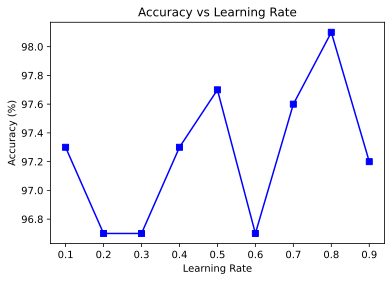

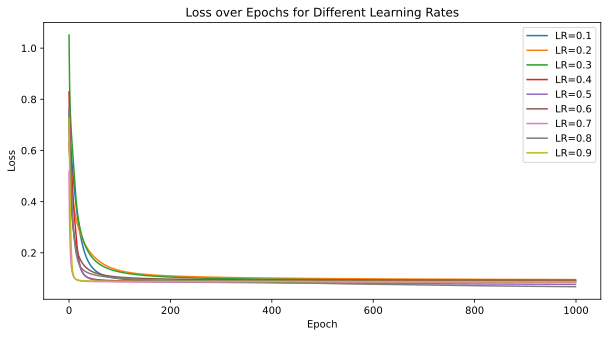

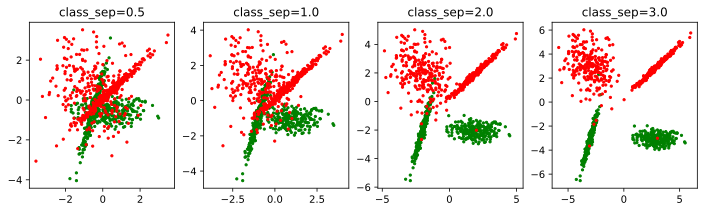

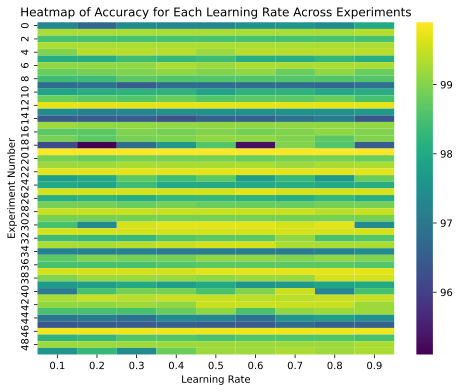

In [22]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

# Fix inline plotting for Jupyter
%matplotlib inline

# ------------------------------
# 1. Data creation function
# ------------------------------
def create_data(class_sep=2.0, n_samples=1000, seed=42):
    X, y = make_classification(
        n_samples=n_samples, n_features=2,
        n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
        n_clusters_per_class=2, weights=None, flip_y=0.01,
        class_sep=class_sep, hypercube=True, shift=0.0, scale=1.0,
        shuffle=True, random_state=seed
    )
    data = torch.tensor(X).float()
    labels = torch.tensor(y).float().view(-1,1)
    return data, labels

# ------------------------------
# 2. Model creation function
# ------------------------------
def create_model(learning_rate):
    ANN = nn.Sequential(
        nn.Linear(2, 4),  # hidden layer with 4 units
        nn.ReLU(),
        nn.Linear(4,1)    # output layer
    )
    loss_func = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(ANN.parameters(), lr=learning_rate)
    return ANN, loss_func, optimizer

# ------------------------------
# 3. Training function
# ------------------------------
def train(ANNmodel, data, labels, loss_func, optimizer, epochs=1000):
    losses = torch.zeros(epochs)
    for i in range(epochs):
        pred = ANNmodel(data)
        loss = loss_func(pred, labels)
        losses[i] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    final_pred = torch.sigmoid(ANNmodel(data))
    accuracy = 100*torch.mean(((final_pred>0.5)==labels).float())
    return losses, final_pred, accuracy

# ------------------------------
# 4. Experiment 1: Multiple learning rates
# ------------------------------
learning_rates = np.round(np.linspace(0.1, 0.9, 9), 2)
acc_by_lr = []
all_losses = np.zeros((len(learning_rates), 1000))

# Create a dataset
data, labels = create_data(class_sep=2.0, seed=42)

for i, lr in enumerate(learning_rates):
    ANN, loss_func, optimizer = create_model(lr)
    losses, _, acc = train(ANN, data, labels, loss_func, optimizer)
    acc_by_lr.append(acc.item())
    all_losses[i,:] = losses.detach()

# Plot accuracy vs learning rate
plt.figure(figsize=(6,4))
plt.plot(learning_rates, acc_by_lr, 's-', color='blue')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Learning Rate')
plt.show()

# Plot losses for each learning rate
plt.figure(figsize=(10,5))
for i, lr in enumerate(learning_rates):
    plt.plot(all_losses[i], label=f'LR={lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs for Different Learning Rates')
plt.legend()
plt.show()

# ------------------------------
# 5. Experiment 2: Effect of class_sep (clean vs noisy data)
# ------------------------------
separations = [0.5, 1.0, 2.0, 3.0]  # noisy -> clean
plt.figure(figsize=(12,3))
for i, sep in enumerate(separations):
    data, labels = create_data(class_sep=sep, seed=42)
    plt.subplot(1,4,i+1)
    plt.scatter(data[labels[:,0]==0,0], data[labels[:,0]==0,1], c='green', s=5)
    plt.scatter(data[labels[:,0]==1,0], data[labels[:,0]==1,1], c='red', s=5)
    plt.title(f'class_sep={sep}')
plt.show()

# ------------------------------
# 6. Experiment 3: Heatmap for learning rate vs experiment
# ------------------------------
Exps = 50
heatmap_acc = np.zeros((Exps, len(learning_rates)))

for e in range(Exps):
    data, labels = create_data(class_sep=2.0, seed=42+e)  # slightly different seed
    for j, lr in enumerate(learning_rates):
        ANN, loss_func, optimizer = create_model(lr)
        _, _, acc = train(ANN, data, labels, loss_func, optimizer)
        heatmap_acc[e,j] = acc.item()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_acc, xticklabels=learning_rates, cmap='viridis')
plt.xlabel('Learning Rate')
plt.ylabel('Experiment Number')
plt.title('Heatmap of Accuracy for Each Learning Rate Across Experiments')
plt.show()
